In [16]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading  Data
The dataset contains daily closing prices of 20 countries for the year of 2020

In [20]:
data = pd.read_csv('stock_indices.csv')

data = data.drop(['Date'], axis=1)
data = data.loc[(data!=0).any(axis=1)] 
data

,US,Norway,Australia,China,India,Indonesia,Japan,Korea,Newzealand,Taiwan,Thailand,Finland,France,Germany,Netherland,Spain,Sweden,Brazil,Canada,Mexico
0,28538.44,1032.239990,6802.4,10430.769531,41306.02,6299.539063,23656.619141,2197.669922,11491.90,11997.139648,1579.84,32.97,5978.060059,13249.009766,604.58,9549.200195,680.81,115964.0,17063.40039,43541.019531
1,28868.80,1043.300049,6810.0,10638.820313,41626.64,6283.581055,23656.619141,2175.169922,11532.74,12100.480469,1595.82,34.47,6041.500000,13385.929688,612.87,9691.200195,693.56,118573.0,17100.00000,44437.230469
2,28634.88,1047.329956,6855.2,10656.410156,41464.61,6323.465820,23656.619141,2176.459961,11593.14,12110.429688,1595.82,32.97,6044.160156,13219.139648,611.06,9646.599609,686.60,117707.0,17066.09961,44624.851563
3,28634.88,1047.329956,6855.2,10656.410156,41464.61,6323.465820,23656.619141,2176.459961,11593.14,12110.429688,1595.82,32.97,6044.160156,13219.139648,611.06,9646.599609,686.60,117707.0,17066.09961,44624.851563
4,28634.88,1047.329956,6855.2,10656.410156,41464.61,6323.465820,23656.619141,2176.459961,11541.57,12110.429688,1594.97,32.97,6044.160156,13219.139648,611.06,9646.599609,686.60,117707.0,17066.09961,44624.851563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,30199.87,1026.829956,6917.5,14017.059570,46973.54,6008.708984,26656.609375,2806.860107,13037.94,14331.419922,1486.31,51.15,5522.009766,13587.230469,626.37,8111.500000,760.34,117857.0,17623.90039,43372.199219
362,30403.97,1040.459961,6917.5,14044.099609,47353.75,6093.554199,26854.029297,2808.600098,13093.07,14483.070313,1452.67,51.90,5588.379883,13790.290039,627.59,8155.600098,768.63,119051.0,17623.90039,43883.410156
363,30335.67,1043.939941,6962.1,13970.209961,47613.08,6036.173828,27568.150391,2820.510010,13236.40,14472.049805,1461.95,51.85,5611.790039,13761.379883,629.14,8174.799805,774.15,119475.0,17543.40039,44693.988281
364,30409.56,1047.589966,6942.9,14201.570313,47746.22,5979.073242,27444.169922,2873.469971,13236.54,14687.700195,1449.35,54.70,5599.410156,13718.780273,628.06,8154.399902,768.38,119306.0,17545.80078,44693.960938


## Calculating Log Returns of Prices
Considering a network of n stocks with prices in d trading days, denote Pi,t and Ri,t as the closing price and log-return of stock i at day t, respectively, given by
<img src='returns.png'/>

In [31]:
data_log = data.applymap(np.log)
returns = data_log-data_log.shift(1)
returns = returns.drop(returns.index[0])
returns

,US,Norway,Australia,China,India,Indonesia,Japan,Korea,Newzealand,Taiwan,Thailand,Finland,France,Germany,Netherland,Spain,Sweden,Brazil,Canada,Mexico
1,0.011509,0.010658,0.001117,0.019750,0.007732,-0.002536,0.000000,-0.010291,0.003548,0.008577,0.010064,0.044491,0.010556,0.010281,0.013619,0.014761,0.018554,0.022249,0.002143,2.037417e-02
2,-0.008136,0.003855,0.006615,0.001652,-0.003900,0.006327,0.000000,0.000593,0.005224,0.000822,0.000000,-0.044491,0.000440,-0.012538,-0.002958,-0.004613,-0.010086,-0.007330,-0.001984,4.213272e-03
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.004458,0.000000,-0.000533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
5,0.002389,-0.000162,0.000321,0.003920,-0.019187,-0.010502,-0.019281,-0.009876,0.007402,-0.013055,-0.016735,-0.030800,-0.005071,-0.006995,-0.006271,-0.004749,0.000000,-0.007068,0.002306,-2.907331e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
362,0.006736,0.013187,0.000000,0.001927,0.008062,0.014022,0.007379,0.000620,0.004220,0.010526,-0.022893,0.014556,0.011948,0.014834,0.001946,0.005422,0.010844,0.010080,0.000000,1.171768e-02
363,-0.002249,0.003339,0.006427,-0.005275,0.005461,-0.009461,0.026245,0.004232,0.010888,-0.000761,0.006368,-0.000964,0.004180,-0.002099,0.002467,0.002351,0.007156,0.003555,-0.004578,1.830265e-02
364,0.002433,0.003490,-0.002762,0.016425,0.002792,-0.009505,-0.004507,0.018603,0.000011,0.014791,-0.008656,0.053509,-0.002208,-0.003100,-0.001718,-0.002499,-0.007481,-0.001416,0.000137,-6.117827e-07


Hence, for stock i, we set the corresponding log-return interval as [minR<sub>i,t</sub>, maxR<sub>i,t</sub>] and uniformly divide it into k sub intervals. We compute the frequency of stock i falling into the subinterval q, and approximate the probability by using the frequency
<img src="probability.png"/>
The entropy of stock i then is approximated by
<img src="entropy.png"/>
To compute the joint entropy of stocks i and j, we uniformly divide the square of log-return [minR<sub>i,t</sub>, maxR<sub>i,t</sub>] × [minR<sub>j,t</sub>, maxR<sub>j,t</sub>] into k × k bins. Denote f<sub>i,j,q,r</sub>/d as the frequency of joint logreturns
falling into the bin (q, r), which can substitute the joint probability distribution with
<img src="jointprobability.png"/>
The joint entropy of stock i and j can be approximately computed by
<img src="jointentropy.png"/>
and the mutual information of stock i and j is estimated by
<img src="mui.png"/>

## Functions Required for Calculating Probabilities and Entropy

In [32]:
def create_bin(arr, numbins):
    mx = np.max(arr)
    mn = np.min(arr)

    step = (mx-mn)/numbins
    bin_selector = np.zeros(numbins+1)
    bin_selector[0] = mn - 1e-4
    for i in range(1, numbins):
        bin_selector[i] = mn + i*step
    bin_selector[-1] = mx + 1e-4
    return bin_selector

In [33]:
def binning(arr, bin_selector):
    binned = []
    for val in arr:
        for i in range(len(bin_selector)-1):
            if(val>=bin_selector[i] and val<bin_selector[i+1]):
                binned.append(i)
    return binned

In [34]:
def probas(binned, numbins):
    counts = {}
    ps = {}
    binidxs = list(range(numbins))
    N = len(binned)
    for element in binned:
        if  element in counts:
            counts[element] += 1
        else:
            counts[element] = 1
    for idx in binidxs:
        if idx not in counts:
            counts[idx] = 0
            
    for k, v in counts.items():
        ps[k] = v/N;
    return ps, counts

## Calculating Probabilities and Entropy of Stock Market

In [35]:
numbins = 10
total_binned = []

for i, x in enumerate(returns.columns):
    bin_selector = create_bin(returns[x], numbins)
    binned = binning(returns[x], bin_selector)
    total_binned.append(binned)
total_binned = np.array(total_binned)

In [36]:
total_probas = []
for i in range(total_binned.shape[0]):
    arr = total_binned[i]
    ps, _ = probas(arr, numbins)
    total_probas.append(list(ps.values()))
total_probas = np.array(total_probas)

In [37]:
H = []
for i in range(total_probas.shape[0]):
    ps = total_probas[i]
    ps = ps[ps!=0]
    entropy = -1 * np.sum( ps * np.log2(ps) )
    H.append(entropy)
H = np.array(H) 
H

array([1.35776611, 1.6501724 , 1.64901086, 1.905131  , 1.21054318,
       1.5415346 , 1.718131  , 1.54717767, 1.64311244, 1.70514992,
       1.48315406, 2.23823283, 1.53853508, 1.36799898, 1.46939599,
       1.48402446, 1.4125933 , 1.40420355, 1.01757581, 2.17319284])

## Functions Required for Calculating Joint Probabilities and Joint Entropy

In [38]:
def joint_binning(arr1, arr2, bin_selector1, bin_selector2):
    binned = []
    for v1, v2 in zip(arr1, arr2):
        b1 = -1
        b2 = -1
        for i in range(len(bin_selector1)-1):
            if(v1>=bin_selector1[i] and v1<bin_selector1[i+1]):
                b1 = i;
        for i in range(len(bin_selector2)-1):
            if(v2>=bin_selector2[i] and v2<bin_selector2[i+1]):
                b2 = i;
        binned.append((b1, b2))
    return binned

In [39]:
def joint_probas(binned, numbins):
    counts = {}
    ps = {}
    binidxs = []
    for i in range(numbins):
        for j in range(numbins):
            binidxs.append((i, j))
    N = len(binned)
    
    for element in binned:
        if  element in counts:
            counts[element] += 1
        else:
            counts[element] = 1
    for idx in binidxs:
        if idx not in counts:
            counts[idx] = 0
            
    for k, v in counts.items():
        ps[k] = v/N;
    return ps, counts

## Calculating Joint Probabilities and Joint Entropy of Stock Market

In [41]:
#This cell may take few times
size = returns.shape[1]
total_joint_probas = np.zeros((size, size, numbins*numbins))
for idxi, i in enumerate(returns.columns):
    for idxj, j in enumerate(returns.columns):
        bini = create_bin(returns[i], numbins)
        binj = create_bin(returns[j], numbins)
        binned = joint_binning(returns[i], returns[j], bini, binj)
        jps, _ = joint_probas(binned, numbins)
        total_joint_probas[idxi][idxj][:] = np.array(list(jps.values()))
        
total_joint_probas = np.array(total_joint_probas)

In [43]:
size = returns.shape[1]
jointH = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        arr = total_joint_probas[i][j]
        arr = arr[arr!=0]
        joint_entropy = -1*np.sum(arr*np.log2(arr))
        jointH[i][j] = joint_entropy

pd.DataFrame(jointH)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.357766,2.627787,2.681801,3.121613,2.320693,2.649189,2.767038,2.640512,2.785872,2.814089,2.654318,3.364193,2.500087,2.296061,2.435763,2.451770,2.407294,2.288271,1.800555,3.069642
1,2.627787,1.650172,2.962322,3.379297,2.563277,2.911722,3.028459,2.894202,3.056122,3.034206,2.884498,3.558763,2.639979,2.467521,2.612640,2.599052,2.476129,2.790379,2.358558,3.446865
2,2.681801,2.962322,1.649011,3.341419,2.605656,2.910635,2.905180,2.776163,3.077419,3.052564,2.901779,3.645931,2.860111,2.761803,2.835773,2.848682,2.750600,2.756368,2.311816,3.502930
3,3.121613,3.379297,3.341419,1.905131,2.966845,3.275238,3.415343,3.221155,3.406129,3.378034,3.116644,3.922568,3.250675,3.145995,3.199161,3.203807,3.117595,3.156532,2.786353,3.846850
4,2.320693,2.563277,2.605656,2.966845,1.210543,2.524424,2.699222,2.476690,2.744480,2.603451,2.448274,3.275560,2.425974,2.291896,2.406280,2.429127,2.313961,2.400931,1.974995,3.122359
5,2.649189,2.911722,2.910635,3.275238,2.524424,1.541535,2.998153,2.768042,3.046096,2.989237,2.848658,3.543734,2.857431,2.692195,2.785438,2.791376,2.710841,2.695804,2.309431,3.428963
6,2.767038,3.028459,2.905180,3.415343,2.699222,2.998153,1.718131,2.892793,3.159312,3.055559,2.965307,3.716539,2.982247,2.852537,2.938406,2.980082,2.886301,2.843282,2.462789,3.606617
7,2.640512,2.894202,2.776163,3.221155,2.476690,2.768042,2.892793,1.547178,3.013623,2.854557,2.826823,3.535578,2.781649,2.680914,2.736022,2.774180,2.706974,2.702796,2.288361,3.418029
8,2.785872,3.056122,3.077419,3.406129,2.744480,3.046096,3.159312,3.013623,1.643112,3.126819,2.943587,3.724643,3.036296,2.848662,2.947643,2.942017,2.873057,2.827636,2.505073,3.587691
9,2.814089,3.034206,3.052564,3.378034,2.603451,2.989237,3.055559,2.854557,3.126819,1.705150,2.877554,3.645150,2.969778,2.815403,2.902904,2.919866,2.809210,2.846782,2.509176,3.586479


## Mutual Information

In [45]:
size = returns.shape[1]
MI = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        MI[i][j] = H[i] + H[j] - jointH[i][j]
np.fill_diagonal(MI, 0)

pd.DataFrame(MI)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.380151,0.324976,0.141284,0.247616,0.250112,0.308860,0.264432,0.215006,0.248827,0.186602,0.231806,0.396214,0.429704,0.391399,0.390020,0.363066,0.473698,0.574787,0.461317
1,0.380151,0.000000,0.336861,0.176006,0.297438,0.279985,0.339844,0.303148,0.237163,0.321116,0.248828,0.329642,0.548728,0.550651,0.506928,0.535145,0.586637,0.263997,0.309190,0.376500
2,0.324976,0.336861,0.000000,0.212723,0.253898,0.279910,0.461962,0.420026,0.214704,0.301597,0.230386,0.241313,0.327435,0.255207,0.282634,0.284354,0.311004,0.296847,0.354771,0.319274
3,0.141284,0.176006,0.212723,0.000000,0.148829,0.171428,0.207919,0.231154,0.142115,0.232247,0.271641,0.220795,0.192991,0.127135,0.175366,0.185349,0.200130,0.152803,0.136353,0.231474
4,0.247616,0.297438,0.253898,0.148829,0.000000,0.227653,0.229452,0.281031,0.109176,0.312242,0.245423,0.173216,0.323104,0.286646,0.273659,0.265441,0.309175,0.213816,0.253124,0.261377
5,0.250112,0.279985,0.279910,0.171428,0.227653,0.000000,0.261513,0.320671,0.138551,0.257448,0.176031,0.236033,0.222639,0.217338,0.225493,0.234184,0.243287,0.249934,0.249680,0.285764
6,0.308860,0.339844,0.461962,0.207919,0.229452,0.261513,0.000000,0.372515,0.201932,0.367722,0.235978,0.239825,0.274419,0.233593,0.249121,0.222073,0.244424,0.279052,0.272918,0.284707
7,0.264432,0.303148,0.420026,0.231154,0.281031,0.320671,0.372515,0.000000,0.176668,0.397770,0.203509,0.249832,0.304064,0.234263,0.280552,0.257023,0.252797,0.248585,0.276393,0.302341
8,0.215006,0.237163,0.214704,0.142115,0.109176,0.138551,0.201932,0.176668,0.000000,0.221443,0.182680,0.156702,0.145352,0.162450,0.164865,0.185120,0.182648,0.219680,0.155615,0.228614
9,0.248827,0.321116,0.301597,0.232247,0.312242,0.257448,0.367722,0.397770,0.221443,0.000000,0.310750,0.298233,0.273907,0.257746,0.271642,0.269308,0.308533,0.262571,0.213550,0.291863


## Normalized Mutual Information

In [46]:
size = returns.shape[1]
NMI = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        NMI[i][j] = (2*MI[i][j])/(H[i] + H[j])

pd.DataFrame(NMI)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.252765,0.216162,0.086600,0.192824,0.172532,0.200826,0.182056,0.143295,0.162477,0.131367,0.128924,0.273600,0.315291,0.276885,0.274489,0.262107,0.343015,0.483961,0.261298
1,0.252765,0.000000,0.204209,0.099010,0.207947,0.175445,0.201790,0.189624,0.144028,0.191407,0.158827,0.169551,0.344170,0.364890,0.324999,0.341488,0.383076,0.172865,0.231799,0.196947
2,0.216162,0.204209,0.000000,0.119704,0.177578,0.175462,0.274394,0.262829,0.130435,0.179835,0.147110,0.124156,0.205446,0.169179,0.181268,0.181520,0.203164,0.194449,0.266086,0.167063
3,0.086600,0.099010,0.119704,0.000000,0.095536,0.099474,0.114769,0.133912,0.080104,0.128659,0.160341,0.106578,0.112085,0.077684,0.103935,0.109377,0.120643,0.092346,0.093306,0.113514
4,0.192824,0.207947,0.177578,0.095536,0.000000,0.165441,0.156693,0.203814,0.076517,0.214180,0.182220,0.100450,0.235063,0.222332,0.204228,0.197019,0.235729,0.163546,0.227208,0.154490
5,0.172532,0.175445,0.175462,0.099474,0.165441,0.000000,0.160454,0.207640,0.087012,0.158591,0.116396,0.124893,0.144567,0.149397,0.149783,0.154803,0.164710,0.169692,0.195130,0.153855
6,0.200826,0.201790,0.274394,0.114769,0.156693,0.160454,0.000000,0.228165,0.120153,0.214836,0.147427,0.121235,0.168528,0.151382,0.156310,0.138702,0.156145,0.178746,0.199523,0.146329
7,0.182056,0.189624,0.262829,0.133912,0.203814,0.207640,0.228165,0.000000,0.110753,0.244606,0.134315,0.131997,0.197079,0.160719,0.186007,0.169585,0.170822,0.168453,0.215532,0.162533
8,0.143295,0.144028,0.130435,0.080104,0.076517,0.087012,0.120153,0.110753,0.000000,0.132274,0.116868,0.080746,0.091369,0.107900,0.105937,0.118396,0.119546,0.144179,0.116974,0.119809
9,0.162477,0.191407,0.179835,0.128659,0.214180,0.158591,0.214836,0.244606,0.132274,0.000000,0.194931,0.151257,0.168886,0.167740,0.171137,0.168889,0.197921,0.168891,0.156865,0.150509


## Correlation Matrix

In [47]:
corr_mat = returns.corr()

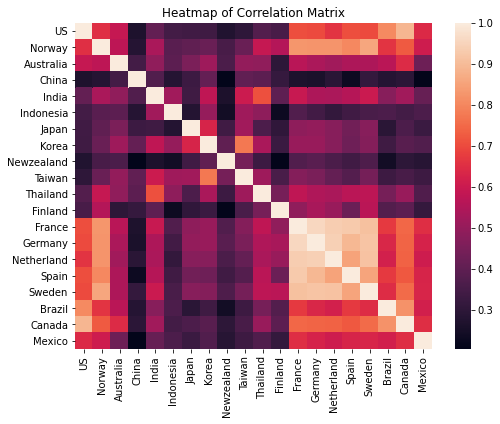

In [53]:
plt.figure(figsize=(8,6))
plt.title("Heatmap of Correlation Matrix")
sns.heatmap(corr_mat)
plt.show()

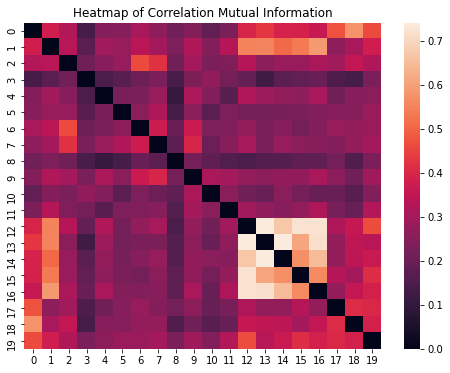

In [52]:
plt.figure(figsize=(8,6))
plt.title("Heatmap of Correlation Mutual Information")
sns.heatmap(MI)
plt.show()

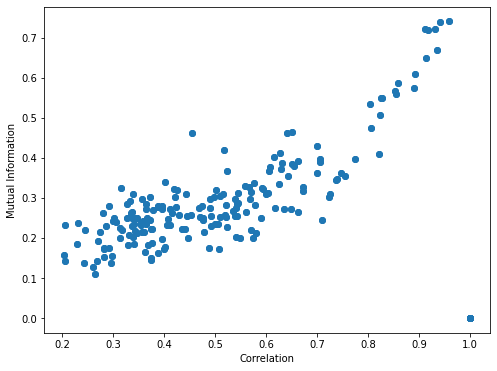

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(corr_mat, MI)
plt.xlabel('Correlation')
plt.ylabel('Mutual Information')
plt.show()